In [4]:
from IPython.core.magic import register_cell_magic
@register_cell_magic
def skip(line, cell):
    return

import matplotlib.pyplot as plt
plt.ion()

from phys_functions import init_slope, logslope_arr
from phys_constants import *
from phys_functions_shells import shells_complete_setup, shells_add_analytics, shells_add_radNorm
from IO import *
from hydro_fits import *
from radiation import *
from run_analysis import *

In [2]:
key = 'sph_fid'
env = MyEnv(key)
front = 'RS'
data = open_rundata(key, 4)
data_fitted = replace_withfit(data)
contribs = data_fitted.drop_duplicates(subset='i')


In [6]:
# quick comparison between crossing radii
lfac2_sph, m, _ = get_hydrofits_shell(data)[0]
Rf_fit = crossing_radius_fromfit(m, lfac2_sph, env)/env.R0
Rf = get_Rcrossing(key, 4)
print((Rf_fit-Rf)/Rf)

0.03496570464661222


In [3]:
%%skip
%matplotlib qt
plt.plot(data.index, data.rho, label='initial data')
plt.plot(data_fitted.index, data_fitted.rho, label='fitted early')
plt.scatter(contribs.index, contribs.rho, marker='x', c='k', label='contributing cells')
plt.legend()

In [11]:
def update_env(name, value, env):
  '''
  Update environment after changing one (or more) the 'input' variables
    (variables defined in phys_input.ini)
    name and value can be lists or arrays
  '''
  name_isarr = ((type(name) == list) or (type(name) == np.ndarray))
  value_isarr = ((type(value) == list) or (type(value) == np.ndarray))
  if (name_isarr and value_isarr):
    for n, v in zip(name, value):
      setattr(env, n, v)
  else:
    setattr(env, name, value)
  shells_complete_setup(env, 0.)
  shells_add_analytics(env)
  shells_add_radNorm(env)

def fetch_value_updated(name, name_var, value_var, env):
  '''
  Get the new value of quantity 'name' after updating the env
  '''
  update_env(name_var, value_var, env)
  value = getattr(env, name)
  return value



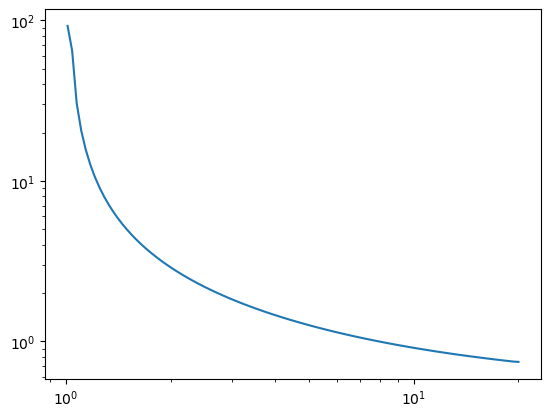

In [15]:
au_arr = np.geomspace(1.01, 20, 100)
env = MyEnv(key)
ShSt = np.array([fetch_value_updated('lfac34', 'u4', au*env.u1, env) for au in au_arr])
ShSt -= 1.
s = logslope_arr(au_arr, ShSt)
plt.loglog(au_arr, s)

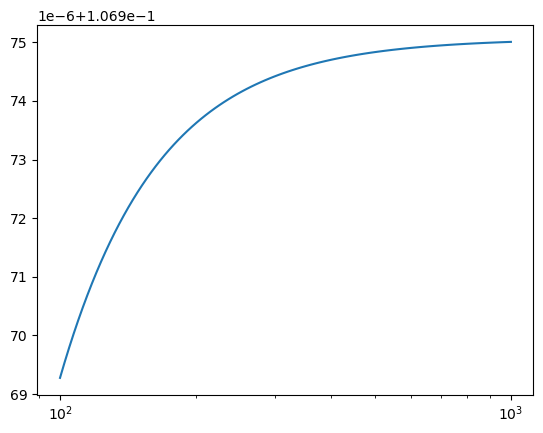

In [17]:
u_arr = np.geomspace(100, 1000, 100)
au = 2
env = MyEnv(key)
ShSt = np.array([fetch_value_updated('lfac34', ['u1', 'u4'], [u, au*u], env) for u in u_arr])
ShSt -= 1.
#s = logslope_arr(u_arr, ShSt)
plt.semilogx(u_arr, ShSt)
#plt.plot(u_arr, s)